In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tasks = ["Ackley", "Ackley", "Ackley", "Ackley"]
# tasks = ["Ackley", "Rastrigin", "Rosenbrock", "Levy"]

buffer_sizes = [500, 500, 500, 500]
# buffer_sizes = [500, 1000, 500, 500]

dims = [200, 200]
# dims = [200, 400]

n_init = [200, 200, 200, 200]
batch_size = [100, 100, 100, 100]
max_evals_mcmcbo = 6000
max_evals = 10000
number_of_seeds = 4

In [3]:
methods = ["pibo", "turbo", "mcmcbo", "lamcts", "ddom", "diffbbo", "cmaes"]
names = ["Ours", "TuRBO", "MCMC-BO (TuRBO)", "LA-MCTS (TuRBO)", "DDOM", "Diff-BBO", "CMA-ES"]
colors = ["royalblue", "firebrick", "darkorange", "darkgreen", "deepskyblue", "purple", "pink"]
performance = np.zeros((len(dims), len(tasks), len(methods), number_of_seeds, max_evals))
for i in range(len(dims)):
    for j in range(len(tasks)):
        for k in range(len(methods)):
            for seed in range(number_of_seeds):
                if methods[k] == "pibo" :
                    results = np.load(f"{tasks[j]}_{dims[i]}_results/{methods[k]}/{methods[k]}_{tasks[j]}_{dims[i]}_{seed}_{n_init[j]}_{batch_size[j]}_{max_evals}_{max_evals}_{buffer_sizes[i]}.npy")
                elif methods[k] == "mcmcbo":
                    results = np.load(f"{tasks[j]}_{dims[i]}_results/{methods[k]}/{methods[k]}_{tasks[j]}_{dims[i]}_{seed}_{n_init[j]}_{max_evals_mcmcbo}_{max_evals_mcmcbo}.npy")
                else:
                    results = np.load(f"{tasks[j]}_{dims[i]}_results/{methods[k]}/{methods[k]}_{tasks[j]}_{dims[i]}_{seed}_{n_init[j]}_{max_evals}_{max_evals}.npy")
                
                results = np.maximum.accumulate(results)
                if methods[k] == "mcmcbo":
                    results = np.concatenate([results, np.full(max_evals - max_evals_mcmcbo, results[-1])])
                performance[i, j, k, seed] = results.flatten()[:max_evals]

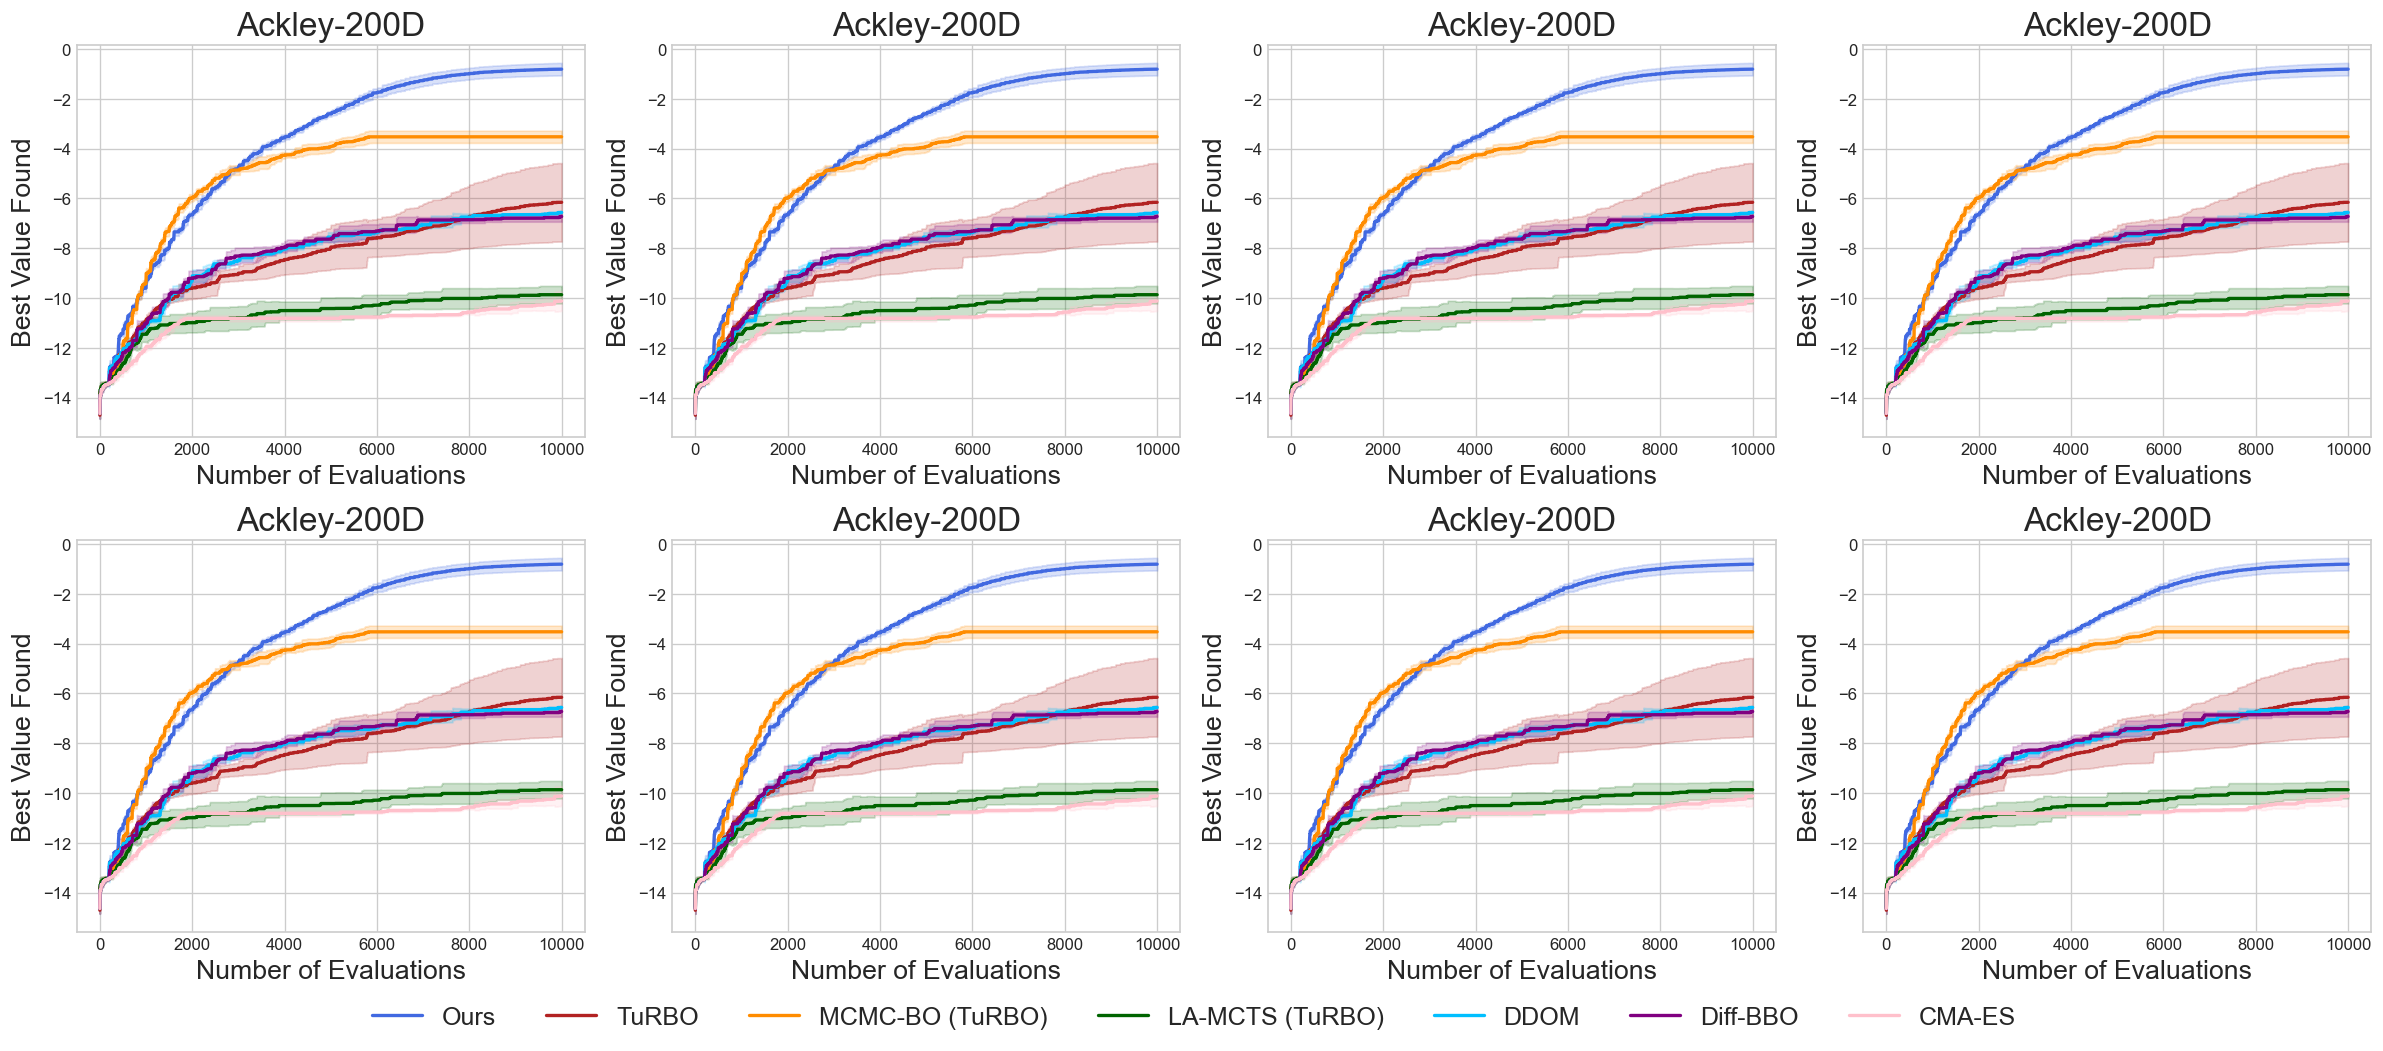

In [4]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(len(dims), len(tasks), figsize=(20.0, 8.4), dpi=120)
plt.subplots_adjust(hspace=0.3)
for i in range(len(dims)):
    for j in range(len(tasks)):
        for k in range(len(methods)):
            mean = np.mean(performance[i, j, k], axis=0)
            std = np.std(performance[i, j, k], axis=0)
            ax[i, j].plot(mean, label=names[k], color=colors[k], linewidth=2.0)
            ax[i, j].fill_between(range(max_evals), mean - std, mean + std, color=colors[k], alpha=0.2)
        ax[i, j].set_title(f"{tasks[j]}-{dims[i]}D", fontsize=20)
        ax[i, j].set_xlabel("Number of Evaluations", fontsize=16)
        ax[i, j].set_ylabel("Best Value Found", fontsize=16)
        # ax[i].legend(fontsize=12)
        
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(methods), fontsize=15, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()

In [5]:
tasks = ["HalfCheetah", "HalfCheetah", "HalfCheetah"]
# tasks = ["Rover", "HalfCheetah", "LassoDNA"]

buffer_sizes = [300, 300, 300]
# buffer_sizes = [200, 300, 200]

dims = [102, 102, 102]
# dims = [100, 102, 180]

n_init = [100, 100, 100]
# n_init = [200, 100, 200]
batch_size = [50, 50, 50, 50]
# batch_size = [100, 100, 100, 100]

max_evals = 2000
number_of_seeds = 4

In [8]:
methods = ["pibo", "turbo", "mcmcbo", "lamcts", "ddom", "diffbbo", "cmaes", "cmaturbo"]
names = ["Ours", "TuRBO", "MCMC-BO (TuRBO)", "LA-MCTS (TuRBO)", "DDOM", "Diff-BBO", "CMA-ES", "CMA-TuRBO"]
colors = ["royalblue", "firebrick", "darkorange", "darkgreen", "deepskyblue", "purple", "pink", "gold"]
performance = np.zeros((len(tasks), len(methods), number_of_seeds, max_evals))
for i in range(len(tasks)):
    for k in range(len(methods)):
        for seed in range(number_of_seeds):
            if methods[k] == "pibo" :
                results = np.load(f"{tasks[i]}_{dims[i]}_results/{methods[k]}/{methods[k]}_{tasks[i]}_{dims[i]}_{seed}_{n_init[i]}_{batch_size[i]}_{buffer_sizes[i]}_{max_evals}_{max_evals}.npy")
            elif methods[k] == "cmaturbo":
                data = np.load(f"{tasks[i]}_{dims[i]}_results/{methods[k]}/{methods[k]}_{tasks[i]}_{dims[i]}_{seed}_{n_init[i]}_{max_evals}_{max_evals}.pkl", allow_pickle=True)
                results = []
                for j in range(len(data['es_data'])):
                    results.append(data['es_data'][j]['fx'].flatten())
                results = -np.concatenate(results)[:max_evals]
            else:
                results = np.load(f"{tasks[i]}_{dims[i]}_results/{methods[k]}/{methods[k]}_{tasks[i]}_{dims[i]}_{seed}_{n_init[i]}_{max_evals}_{max_evals}.npy")
            
            results = np.maximum.accumulate(results).flatten()
            # if methods[k] == "mcmcbo":
            #     results = np.concatenate([results, np.full(max_evals - max_evals_mcmcbo, results[-1])])
            if len(results) < max_evals:
                results = np.concatenate([results, np.repeat(results[-1], max_evals - len(results))])
            performance[i, k, seed] = results[:max_evals]

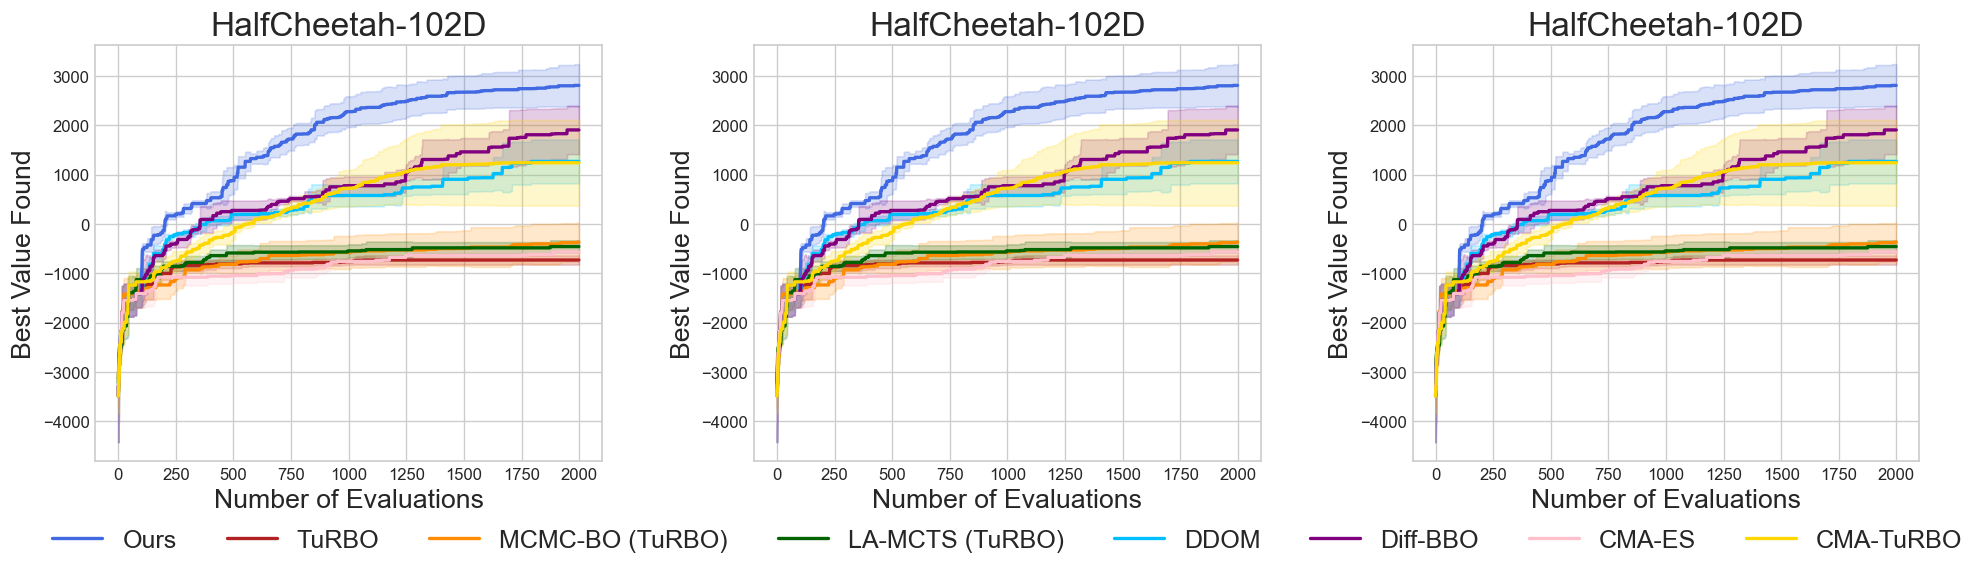

In [9]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(1, len(tasks), figsize=(20.0, 4.5), dpi=120)
plt.subplots_adjust(wspace=0.3, left=0.12, right=0.88)
for i in range(len(tasks)):
    for k in range(len(methods)):
        mean = np.mean(performance[i, k], axis=0)
        std = np.std(performance[i, k], axis=0)
        ax[i].plot(mean, label=names[k], color=colors[k], linewidth=2.0)
        ax[i].fill_between(range(max_evals), mean - std, mean + std, color=colors[k], alpha=0.2)
    ax[i].set_title(f"{tasks[i]}-{dims[i]}D", fontsize=20)
    ax[i].set_xlabel("Number of Evaluations", fontsize=16)
    ax[i].set_ylabel("Best Value Found", fontsize=16)
    # ax[i].legend(fontsize=12)
        
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(methods), fontsize=15, bbox_to_anchor=(0.5, -0.1))
# plt.tight_layout()